<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 1: Practical - Linear Regression <br> <br>
<font color=686880 size=4>
    TAs: Arman Malekzadeh - Yalda Shabanzadeh - Arshia Soltani Moakhar
    
____

### Full Name : Erfan Sadraiye
### Student Number : 99101835
___

colab link : https://colab.research.google.com/drive/1AevWbXPJgb0W0jP0peYOzTNlC3Ae_WFx?usp=sharing

In [ ]:
# run this to download the dataset
!wget -O 'dataset.csv' https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0

--2023-03-10 14:15:55--  https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2ny75tb1ic141yw/assignment1.csv [following]
--2023-03-10 14:15:55--  https://www.dropbox.com/s/raw/2ny75tb1ic141yw/assignment1.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc13b2b56cfd25febe2f2672c6ba.dl.dropboxusercontent.com/cd/0/inline/B38hzNsRJKy-MNqnew8kaccjQijf9pu0y277LDUIOefVm036EM1LKaW50XFoo9C1qLcpYbEzlAQQGa_P5JIGIUnDjjTAIkzqVLUSmER1Po0vqsEHK31PNErq-FbD-T2gn7YLczvsgJwc5WX9UwRBntkBBsfBXIaH0blTFs_XQHZQsQ/file# [following]
--2023-03-10 14:15:55--  https://uc13b2b56cfd25febe2f2672c6ba.dl.dropboxusercontent.com/cd/0/inline/B38hzNsRJKy-MNqnew8kaccjQijf9pu0y277LDUIOefVm036EM1LKaW50XFoo9C1qL

In [ ]:
# you can use the following libraries
import pandas as pd
import sklearn
import numpy as np
from joblib import dump, load
from matplotlib import pyplot as plt
import seaborn as sns

import os

# Phase 1: Explore

## Sec 1: What do we have here?

load the dataset (as a dataframe) using pandas

In [ ]:
dataset = pd.read_csv("dataset.csv")

display the top rows of the dataframe (top 5 is enough)

In [ ]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


print the names of the columns

In [ ]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

what values can the `region` column take? print the unique values using pandas

In [ ]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

get the number of rows in the dataset

In [ ]:
print(f'number of rows = {dataset.shape[0]}')

number of rows = 1338


make a new column named `rounded_bmi` by rounding each value of the column `bmi` | keep the `bmi` column

In [ ]:
dataset['rounded_bmi'] = dataset['bmi'].round()
dataset

,age,sex,bmi,children,smoker,region,charges,rounded_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,28.0
1,18,male,33.770,1,no,southeast,1725.55230,34.0
2,28,male,33.000,3,no,southeast,4449.46200,33.0
3,33,male,22.705,0,no,northwest,21984.47061,23.0
4,32,male,28.880,0,no,northwest,3866.85520,29.0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,31.0
1334,18,female,31.920,0,no,northeast,2205.98080,32.0
1335,18,female,36.850,0,no,southeast,1629.83350,37.0
1336,21,female,25.800,0,no,southwest,2007.94500,26.0


## Sec 2: Perform EDA

perform EDA on the dataset (e.g., see if there are null values)

In [ ]:
print(dataset.dtypes)

age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
charges        float64
rounded_bmi    float64
dtype: object


In [ ]:
print(dataset.isnull().sum())
dataset = dataset.dropna()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
rounded_bmi    0
dtype: int64


We can see non of the data is null, So it doesn't need to replace the null value.

In [ ]:
dataset.describe()

,age,bmi,children,charges,rounded_bmi
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,30.663677
std,14.049960,6.098187,1.205493,12110.011237,6.096007
min,18.000000,15.960000,0.000000,1121.873900,16.000000
25%,27.000000,26.296250,0.000000,4740.287150,26.000000
50%,39.000000,30.400000,1.000000,9382.033000,30.000000
75%,51.000000,34.693750,2.000000,16639.912515,35.000000
max,64.000000,53.130000,5.000000,63770.428010,53.000000


<AxesSubplot:>

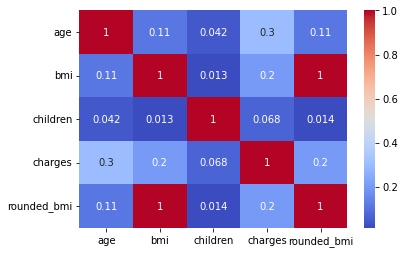

In [ ]:
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

There is only a correlation between rounded_bmi and BMI, and it makes sense because we calculate rounded_bmi based on BMI.
Also, the charges column correlates with BMI and age.

In [ ]:
# sns.pairplot(dataset)

Dou to the previous heatmap and these plots, charges has some correlation with BMI and age.

## Sec 3: Do linear relationships exist?

plot `age` against `charges` | **hint**: you can use matplotlibs

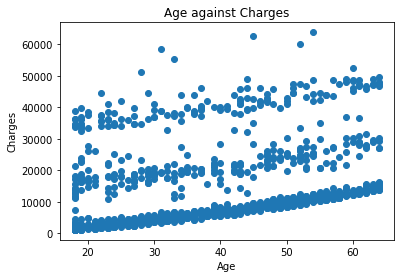

In [ ]:
plt.scatter(dataset['age'], dataset['charges'])
plt.title('Age against Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

print the correlation coefficients matrix

In [ ]:
print(dataset.corr())

                  age       bmi  children   charges  rounded_bmi
age          1.000000  0.109272  0.042469  0.299008     0.109527
bmi          0.109272  1.000000  0.012759  0.198341     0.998920
children     0.042469  0.012759  1.000000  0.067998     0.013915
charges      0.299008  0.198341  0.067998  1.000000     0.198795
rounded_bmi  0.109527  0.998920  0.013915  0.198795     1.000000


# Phase 2: Preprocessing

## Sec 1: Handling Categorical Variables

using one-hot encoding, convert the `region` variable to some numerical variables (the result should be a dataframe)

In [ ]:
region_one_hot = pd.get_dummies(dataset['region'], prefix='region')
region_one_hot

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


do the same thing for the `smoker` variable (the result should be a dataframe)

In [ ]:
smoker_one_hot = pd.get_dummies(dataset['smoker'], prefix='smoker')
smoker_one_hot

,smoker_no,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


do the same thing for the `sex` variable (the result should be a dataframe)

In [ ]:
sex_one_hot = pd.get_dummies(dataset['sex'], prefix='sex')
sex_one_hot

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


concatenate these new dataframes with the initial one using pandas

In [ ]:
one_hot_dataset = dataset.merge(region_one_hot, left_index=True, right_index=True)
one_hot_dataset = one_hot_dataset.merge(smoker_one_hot, left_index=True, right_index=True)
one_hot_dataset = one_hot_dataset.merge(sex_one_hot, left_index=True, right_index=True)
one_hot_dataset = one_hot_dataset.drop(columns=['smoker', 'region', 'sex'])
one_hot_dataset.head(5)


,age,bmi,children,charges,rounded_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.900,0,16884.92400,28.0,0,0,0,1,0,1,1,0
1,18,33.770,1,1725.55230,34.0,0,0,1,0,1,0,0,1
2,28,33.000,3,4449.46200,33.0,0,0,1,0,1,0,0,1
3,33,22.705,0,21984.47061,23.0,0,1,0,0,1,0,0,1
4,32,28.880,0,3866.85520,29.0,0,1,0,0,1,0,0,1


## Sec 2: Normalization

normalize the columns `age`, `bmi`, and `children` | after this, they should take values between 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
one_hot_dataset[['age', 'bmi', 'children']] = scaler.fit_transform(one_hot_dataset[['age', 'bmi', 'children']])
final_dataframe = one_hot_dataset
final_dataframe.head(5)


,age,bmi,children,charges,rounded_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,0.021739,0.321227,0.0,16884.92400,28.0,0,0,0,1,0,1,1,0
1,0.000000,0.479150,0.2,1725.55230,34.0,0,0,1,0,1,0,0,1
2,0.217391,0.458434,0.6,4449.46200,33.0,0,0,1,0,1,0,0,1
3,0.326087,0.181464,0.0,21984.47061,23.0,0,1,0,0,1,0,0,1
4,0.304348,0.347592,0.0,3866.85520,29.0,0,1,0,0,1,0,0,1


# Phase 3: Training

## Sec 1: Making X and Y

make a new dataframe by removing the following columns: "rounded_bmi", "charges" 
| note: do not remove the previous dataframe

In [ ]:
new_dataframe = final_dataframe.drop(columns=['rounded_bmi', 'charges'])

convert the new dataframe into a numpy array named "x"

In [ ]:
x = new_dataframe.to_numpy()

get the "charges" column from the previous dataframe and convert it to another numpy array named "y"

In [ ]:
y = final_dataframe['charges'].to_numpy()

## Sec 2: Splitting the Data

divide the dataset into two portions in a way that 90% of the data belongs to the "training" set (called `x_train`, `y_train`) and the remaining belongs to the "testing" set (called `x_test`, `y_test`)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=53)

## Sec 3 (Optional): Linear Regression from Scratch

Complete this section with your code.

**hint**: 
- use pseudo inverse if matrix is not invertible.
- you can use `np.linalg`.

**note**:
- do **Phase 3:Sec 4** and **Phase 4:all sections** with this model also, then compare your results. 

In [ ]:
class ScratchLinearRegression:
    """
    Fits it on data, then use predict to get results.
    """

    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """
        n_samples, n_features = X.shape
        modified_X = np.c_[X, np.ones(n_samples)]
        n_samples, n_features = modified_X.shape
        U, s, V = np.linalg.svd(modified_X)
        epsilon = 1e-10
        s_inverse = np.zeros((n_features, n_samples))
        square_size = min(modified_X.shape)
        s_inverse[:square_size, :square_size] = np.diag(np.where(s > epsilon, 1 / s, 0))
        X_inverse = np.dot(V.T, np.dot(s_inverse, U.T))
        weights = np.dot(X_inverse, y)
        self.weights = weights[:-1]
        self.bias = weights[-1]
        return self

    def predict(self, X):
        """
        Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        modified_X = np.c_[X, np.ones(X.shape[0])]
        weights = np.append(self.weights, self.bias)
        y_pred = np.dot(modified_X, weights)
        return y_pred

## Sec 4: The real deal!

fit a linear regressor to the data. (Use both regressors - sklearn & from scratch - if you did previous part)

In [ ]:
from sklearn.linear_model import LinearRegression

scratch_model = ScratchLinearRegression()
scratch_model.fit(x_train, y_train)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

get the coefficients of the variables

In [ ]:
print("sklearn's weights :")
for i,column in enumerate(new_dataframe.columns):
  print(f'{column} : {model.coef_[i]}')
print("------------")
print("scratch's weights :")
for i,column in enumerate(new_dataframe.columns):
  print(f'{column} : {scratch_model.weights[i]}')

sklearn's weights :
age : 11535.290735581118
bmi : 13085.59551015052
children : 2622.244385476959
region_northeast : 704.5387036602791
region_northwest : 318.68678887129084
region_southeast : -763.0503909313913
region_southwest : -260.1751016001849
smoker_no : -11800.217528624049
smoker_yes : 11800.217528624058
sex_female : 67.58410191330631
sex_male : -67.58410191330631
------------
scratch's weights :
age : 11535.290735581122
bmi : 13085.595510150528
children : 2622.244385476803
region_northeast : 1724.0511345979849
region_northwest : 1338.1992198089945
region_southeast : 256.46204000631326
region_southwest : 759.3373293375089
smoker_no : -9761.192666748644
smoker_yes : 13839.24239049944
sex_female : 2106.608963788692
sex_male : 1971.4407599621045


get the bias value associated with the model

In [ ]:
print(f'sklearn bias : {model.intercept_}')
print(f'scratch bias : {scratch_model.bias}')

sklearn bias : 9175.611878439266
scratch bias : 4078.0497237507952


## Sec 5: Save/Load the model

Save

In [ ]:
dump(model, 'model.joblib')
dump(scratch_model, 'scratch_model.joblib')

['scratch_model.joblib']

Load

In [ ]:
loaded_model = load('model.joblib')
loaded_scratch_model = load('scratch_model.joblib')

# Phase 4: Evaluation

predict the value of "y" for each "x" belonging to the "testing" set

In [ ]:
y_predicted = loaded_model.predict(x_test)
y_predicted_scratch = loaded_scratch_model.predict(x_test)

compute the mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error

print('mean squared error:')
print(f'sklearn : {sum((y_test - y_predicted)**2)/len(y_test)}')
print(f'scratch : {sum((y_test - y_predicted_scratch)**2)/len(y_test)}')
print()
print('with sklearn library:')
print(f'sklearn : {mean_squared_error(y_test, y_predicted)}')
print(f'scratch : {mean_squared_error(y_test, y_predicted_scratch)}')

mean squared error:
sklearn : 37604959.043388255
scratch : 37604959.04338826

with sklearn library:
sklearn : 37604959.04338828
scratch : 37604959.04338826


return the coefficient of determination of the prediction

In [ ]:
from sklearn.metrics import r2_score

print("sklearn : ", r2_score(y_test, y_predicted))
print("scratch : ", r2_score(y_test, y_predicted_scratch))

sklearn :  0.7757831574951286
scratch :  0.7757831574951286


predict the value of "y" only for the last entry of the "testing" set

In [ ]:
print(f'last y : {y_test[-1]}')
last_entry = x_test[-1].reshape(1, -1)
print("sklearn : ", loaded_model.predict(last_entry)[0])
print("scratch : ", loaded_scratch_model.predict(last_entry)[0])

last y : 5428.7277
sklearn :  10153.355873073922
scratch :  10153.355873073884


# Phase 5 (Optional): Submit your predictions to our Kaggle competition

Competition Link: https://www.kaggle.com/t/77b2fa437095401088e51c73956556ff<br>
You'll have to make a csv file containing two columns: `ID` and `charges`, and submit the file.<br>

In [287]:
from google.colab import drive
drive.mount('/content/drive')
!pip install -q kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!_kaggle# competitions download -c sharif-ml-1401-c1
test_dataframe = pd.read_csv('assignment1-test-data.csv')
test_region_one_hot = pd.get_dummies(test_dataframe['region'], prefix='region')
test_smoker_one_hot = pd.get_dummies(test_dataframe['smoker'], prefix='smoker')
test_sex_one_hot = pd.get_dummies(test_dataframe['sex'], prefix='sex')
test_dataframe = test_dataframe.merge(test_region_one_hot, left_index=True, right_index=True)
test_dataframe = test_dataframe.merge(test_smoker_one_hot, left_index=True, right_index=True)
test_dataframe = test_dataframe.merge(test_sex_one_hot, left_index=True, right_index=True)
test_dataframe = test_dataframe.drop(columns=['smoker', 'region', 'sex'])
test_dataframe[['age', 'bmi', 'children']] = scaler.fit_transform(test_dataframe[['age', 'bmi', 'children']])
test_dataframe_without_id = test_dataframe.drop(columns=['ID']).to_numpy()
y_test_predicted = loaded_model.predict(test_dataframe_without_id)
final_file = pd.DataFrame({'charges': y_test_predicted,'ID': test_dataframe['ID'],})
final_file.to_csv('submission.csv', index=False)

KeyboardInterrupt: ignored